In [33]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
sns.set(style='ticks', rc={'figure.figsize': (15, 10)})


# Содержание:
Подготовила: ***Удачина Анастасия***
## [Анализ количесвта смертей в России с 1990-2020](#cell1):
- [Анализ данных](#cell2)   
- [Тест инверсий](#cell3)
- [Выводы](#cell4)

## [Анализ количества зараженных в России. Наличие второй волны.](#cell5)
- [Анализ данных и подготовка данных](#cell6)
- [Показатели заражений.Графики](#cell7)
- [Тест Уилкоксона ](#cell8)
- [Выводы](#cell9)


<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; 
            background-color:DeepSkyBlue;"><h2><center>Анализ количесвта смертей в России с 1990-2020</center></h2></div>
            <a id="cell1"></a>

<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Анализ данных</center></h2></div>
    <a id="cell2"></a>


## Подготовка данных

In [2]:
data = pd.read_csv("russian_demography.csv")

#### *Поля DataFrame-а*

- "year" -год (1990-2020)
- "region" - город/обалсть
- "npg" - естественный прирост населения на 1000 человек
- "birth_rate" - количество родившихся на 1000 человек
- "death_rate" - количество умершик на 1000 человек
- "gdw" - общий демографический вес (сколько людей не-благополучного возраста составляют 100 человек трудоспособного возраста)
- "urbanization" - процент городского населения

In [3]:
data.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01


In [4]:
data.describe()

,year,npg,birth_rate,death_rate,gdw,urbanization
count,2380.000000,2317.000000,2317.000000,2315.000000,2330.000000,2330.000000
mean,2003.500000,-2.344022,11.549245,13.901382,68.474013,69.148704
std,8.079445,6.064389,3.233035,3.499475,10.453587,13.349880
min,1990.000000,-15.900000,6.200000,3.200000,37.500000,23.630000
25%,1996.750000,-6.200000,9.300000,12.100000,61.380000,62.792500
50%,2003.500000,-3.100000,11.000000,14.100000,68.530000,69.575000
75%,2010.250000,0.700000,13.000000,16.100000,76.895000,77.620000
max,2017.000000,24.800000,29.900000,24.900000,97.530000,100.000000


In [5]:
regions=data['region'].unique()
mill_city=[ 'Altai Krai',
       'Republic of Bashkortostan', 'Belgorod Oblast', 
    'Vladimir Oblast', 'Volgograd Oblast',
       'Vologda Oblast', 'Voronezh Oblast', 'Republic of Dagestan',
      'Zabaykalsky Krai', 
        'Irkutsk Oblast',
        'Kaliningrad Oblast',
      'Kaluga Oblast',   'Kemerovo Oblast', 'Kirov Oblast', 
       'Krasnodar Krai', 'Krasnoyarsk Krai',  'Kursk Oblast', 'Leningrad Oblast',
       'Lipetsk Oblast', 'Moscow', 'Moscow Oblast',
             'Nizhny Novgorod Oblast', 'Novosibirsk Oblast',
       'Omsk Oblast', 'Orenburg Oblast',  'Penza Oblast',
       'Perm Krai', 'Primorsky Krai', 
       'Rostov Oblast', 'Ryazan Oblast',
       'Samara Oblast', 'Saint Petersburg', 'Saratov Oblast',
      'Sverdlovsk Oblast', 
       'Stavropol Krai', 'Tambov Oblast', 'Republic of Tatarstan',
       'Tomsk Oblast', 'Tula Oblast', 'Tyumen Oblast',
       'Udmurt Republic', 'Ulyanovsk Oblast', 'Khabarovsk Krai',
       'Khanty–Mansi Autonomous Okrug – Yugra',
       'Chelyabinsk Oblast', 'Chechen Republic', 'Chuvash Republic',
      'Yaroslavl Oblast']
data= data.drop(data[data.urbanization < 65].index)
data.index = np.arange(len(data))
data=data.loc[(data['region'].isin(mill_city))]
data.index = np.arange(len(data))
data_18_19=pd.read_csv("data20182019.csv")
data_18_19.head()
data_18_19=data_18_19.to_numpy()
data_20=pd.read_csv("2020.csv")
data_20.head()
data_20=data_20.to_numpy()
for i in range (len(data_18_19)):
    data.loc[len(data)] = [2018,data_18_19[i][0],-2.020000,11.147500,data_18_19[i][2],77.416250,76.635000]
    data.loc[len(data)] = [2019,data_18_19[i][0],-2.020000,11.147500,data_18_19[i][1],77.416250,76.635000]
for i in range (len(data_20)):
    data.loc[len(data)] = [2020,data_20[i][0],-2.020000,11.147500,data_20[i][3],77.416250,76.635000]


## Общая ситуция 

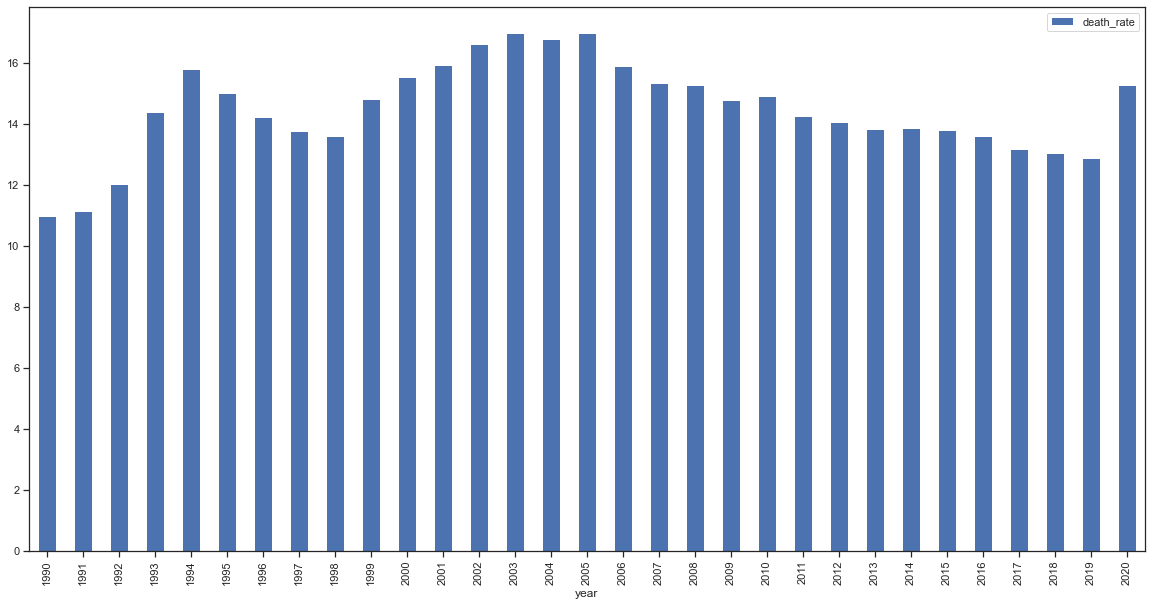

In [6]:
data.groupby(['year']).agg({'death_rate':'mean'}).plot.bar(figsize=(20,10))
plt.show()

## Москва

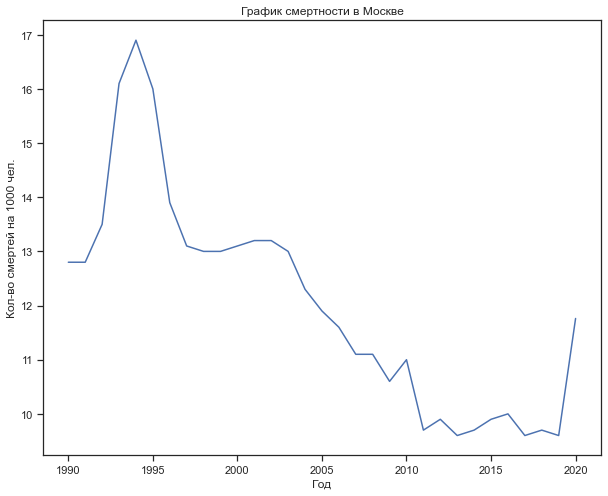

In [7]:
moscow_data=pd.DataFrame(index=data.year.unique(),columns=['year', 'region', 'npg', 'birth_rate', 'death_rate', 'gdw','urbanization'])
k=0
for i in range(len(data)):
    if data.iloc[i].region=='Moscow' or data.iloc[i].region=='г.Москва' and k!=31:
        moscow_data.loc[k]=list(data.loc[i])
        k+=1
moscow_data=moscow_data.dropna()
f = plt.figure(figsize=(10,8))
plt.xlabel("Год")
plt.ylabel("Кол-во смертей на 1000 чел.") 
plt.plot(moscow_data['year'],moscow_data['death_rate'] )
plt.title('График смертности в Москве')
plt.show()

-	Видим, что промежутка 2000–2005  годов был спад смертности в России, но в 2020 произошел резкий скачок
-	Тем не менее, 2020 год-не является лидирующим по количеству смертей.


## Санкт-Петербург

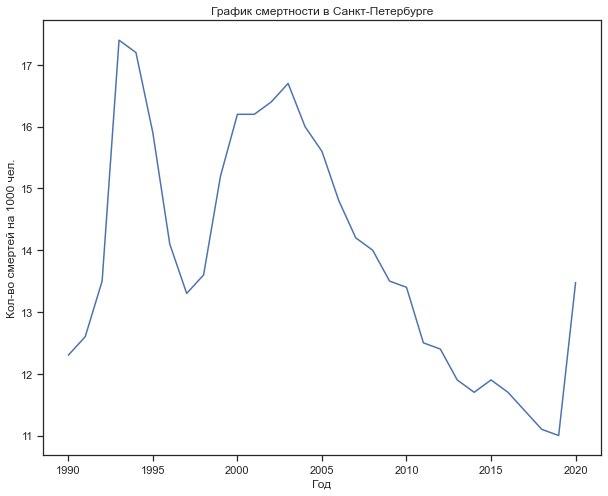

In [8]:
spb_data=pd.DataFrame(index=data.year.unique(),columns=['year', 'region', 'npg', 'birth_rate', 'death_rate', 'gdw','urbanization'])
k=0
for i in range(len(data)):
    if data.iloc[i].region=='Saint Petersburg' or data.iloc[i].region=='г.Санкт-Петербург' and k!=31:
        spb_data.loc[k]=list(data.loc[i])
        k+=1
spb_data=spb_data.dropna()
f = plt.figure(figsize=(10,8))
plt.xlabel("Год")
plt.ylabel("Кол-во смертей на 1000 чел.") 
plt.plot(spb_data['year'],spb_data['death_rate'] )
plt.title('График смертности в Санкт-Петербурге')
plt.show()


*Аналогичная ситуация в Санкт-Петербурге*:
- С середины первого десятилетия 21 века кол-во смертей стремительно уменьшалось, но в 2020 произошел резкий всплеск
- Но 2020 не является лидирующим показателем по кол-ву смертей


## Нижегородская область

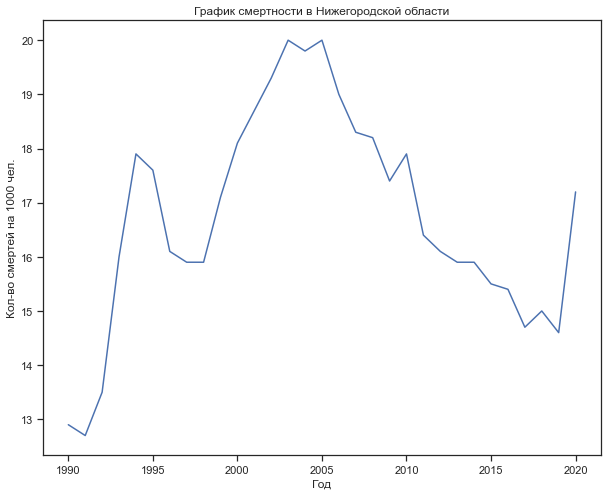

In [9]:
nn_data=pd.DataFrame(index=data.year.unique(),columns=['year', 'region', 'npg', 'birth_rate', 'death_rate', 'gdw','urbanization'])
k=0
for i in range(len(data)):
    if data.iloc[i].region=='Nizhny Novgorod Oblast' or data.iloc[i].region=='Hижегородская область' and k!=31:
        nn_data.loc[k]=list(data.loc[i])
        k+=1
nn_data=nn_data.dropna()
f = plt.figure(figsize=(10,8))
plt.xlabel("Год")
plt.ylabel("Кол-во смертей на 1000 чел.") 
plt.plot(nn_data['year'],nn_data['death_rate'] )
plt.title('График смертности в Нижегородской области')
plt.show()

*В нижегородской области ситуция полность аналогична предыдущим двум*

## Динамика по 3 городам

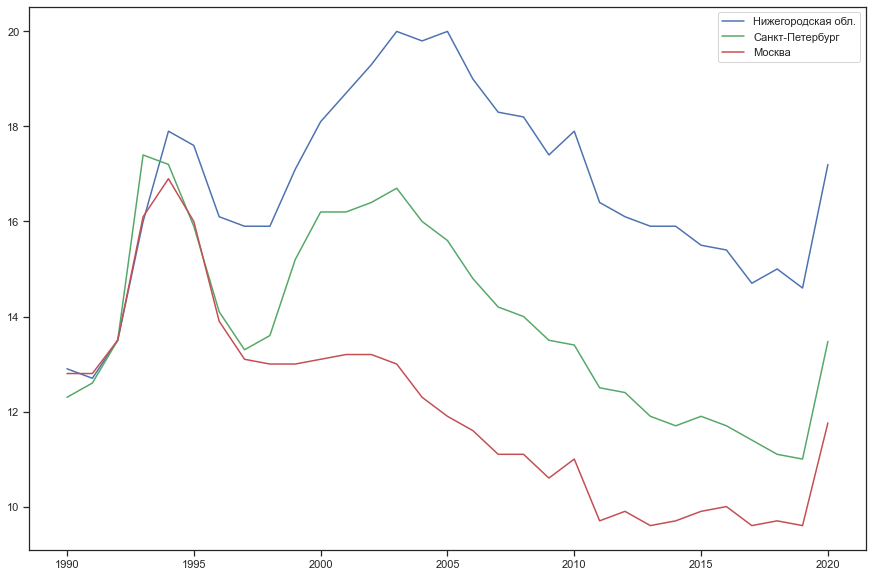

In [10]:
plt.plot(nn_data.year, nn_data.death_rate, 'b-',
         spb_data.year, spb_data.death_rate, 'g-',
         moscow_data.year, moscow_data.death_rate, 'r-')
plt.legend(['Нижегородская обл.','Санкт-Петербург','Москва'])

### *Промежуточный вывод*:
- Используя графики, можно заключить, что кол-во смертей в России с 1990 по 2020 год являются независимыми случайными величинами. То есть конкретной тенденции не прослеживается.
- Также это говорит о том, что 2020-ый год для России не был таким критическим, как, например, промежуток с 2000–2005  или с 1993-1995


### *Проверка гипотез*:
- Основываться лишь на графиках при формулировании выводов будет насовсем корректно, поэтому применяем тест, для проверки нашей гипотезы о том, что кол-во смертей в России с 1990 по 2020 год являются независимыми случайными величинами.


### *Гипотеза случайности*

#### Для чего используем?

- Так как по графикам видно, что данные не подчинены, какой-то определенной тенденции, то следует это проверить с помощью теста.


#### Какой и какого вида критерий будет использоваться?
- Критерий согласия


- Для проверки гипотезы случайности в данной работе применяется критерий **Инверсий**



<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Тест Инверсий</center></h2></div>
    <a id="cell3"></a>

> Последовательнсоть из **N** наблюдений случайной величины **X**

\begin{equation*}
X_1...X_i..X_N
\end{equation*}


<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive
              ">
    
> Если гипотеза: \begin{equation*}H_0 \end{equation*}
верна, то компоненты вектора **X** "равноправны" и поэтому данные не должны быть упорядоченными

> Иными словами ситуации, которая соответствует гипотезе \begin{equation*}H_0 \end{equation*}
можно охарактеризовать как "*полный хаос*"

> При отклонении гипотезы исходные данные имеют тот или иной порядок, проявляются связи

</div>

### *Алгорит на данных*.*Вся выборка*

#### 1. Построение вариационного ряда

<AxesSubplot:>

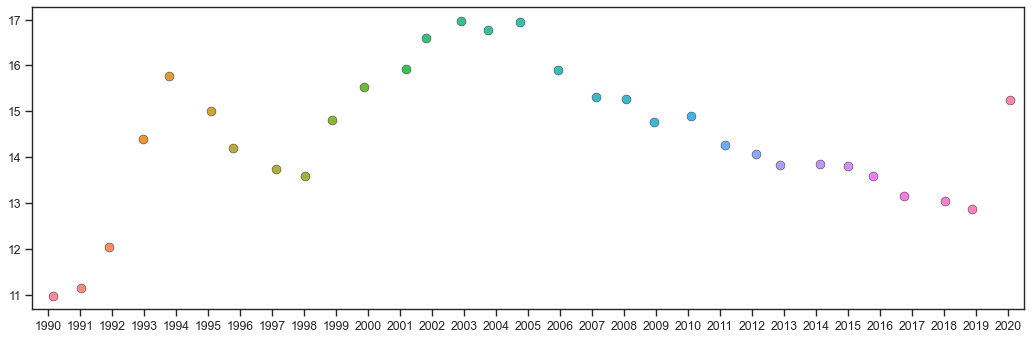

In [11]:
X=data.groupby(['year']).agg({'death_rate':'mean'})['death_rate']
y=1990
X=X.values.tolist()
for i in range(len(X)):
    X[i]=[X[i],y]
    y+=1
X=sorted(X)
# для графика 
x=[]
z=[]
for i in range(len(X)):
    x.append(X[i][1])
    z.append(X[i][0])
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(x, z, jitter=0.25, size=8, ax=ax, linewidth=.5)

In [12]:
# тут можно посмотреть вариационный ряд с:
# X

#### 2. Инверсии 

<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive">
 
> Говорят, что компоненты ***X<sub>i</sub>*** и ***X<sub>i</sub>*** образуют **инверсию**, если ***i < j***,но ***X<sub>i</sub>*** стоит правее в вариационном ряду чем ***X<sub>j</sub>***

</div>

<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive">
 
>    **Статситика**  \begin{equation*}
T=T(n)=h_1+h_2+...+h_N
\end{equation*}

> представляет общее кол-во инверсий в выборке. Она же является естественной мерой "беспорядка" среди наблюдений, и её можно использовать  для проверки гипотезы **H<sub>0</sub>**  


</div>

In [13]:
#Число инверсий для каждого члена вариацинного ряда
h=[]
T_n=0
for i in range(len(X)):
    k=0
    for j in range(len(X)):
        if X[i][0]<X[j][0] and X[i][1]>X[j][1]:
            k+=1
            T_n+=1
    h.append(k)

##### Общее число инверсий. Статистика:

\begin{equation*}
T=T(n)=258
\end{equation*}

##### Критические значения

<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive">

\begin{equation*}
X_1<X_2<X_3<...X_N
\end{equation*}

\begin{equation*}
X_N<X_N-1<...<X_2<X_1
\end{equation*}
- обе ситуации отрицают гипотезу H<sub>0</sub>, хаосе в данных
- в первом варианте статистика T(N)=0
- во втором варианте она максимальна и близка к:
\begin{equation*}
\frac{n(n-1)}{2}
\end{equation*}
 </div>

##### Область принятия гипотезы

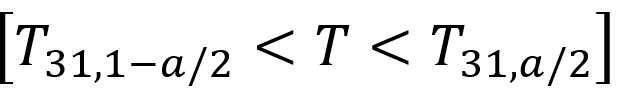

> где значение **T** берется из таблицы "Процентные точки распределения числа инверсий"

> При пороговом уровне статистической значимости \begin{equation*}a=0.05\end{equation*}
\begin{equation*}162<258<272\end{equation*}

> Равенство верно,значит, мы можем принять гипотезу

### *Алгорит на данных*.*Данные с 2003*

#### 1. Построение вариационного ряда

<AxesSubplot:>

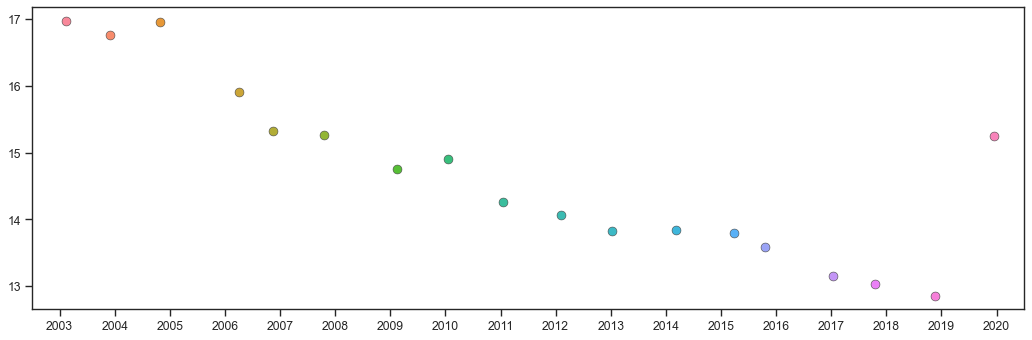

In [14]:
X_1=[]
for i in range(len(X)):
    if X[i][1]>2002:
        X_1.append(X[i])
# для графика 
x=[]
z=[]
for i in range(len(X_1)):
    x.append(X_1[i][1])
    z.append(X_1[i][0])
fig, ax = plt.subplots(figsize=(16,5), dpi= 80)    
sns.stripplot(x, z, jitter=0.25, size=8, ax=ax, linewidth=.5)

In [15]:
# тут можно посмотреть вариационный ряд с:
# X_1

#### 2.Инверсии

In [16]:
#Число инверсий для каждого члена вариацинного ряда
h=[]
T_n=0
for i in range(len(X_1)):
    k=0
    for j in range(len(X_1)):
        if X_1[i][0]<X_1[j][0] and X_1[i][1]>X_1[j][1]:
            k+=1
            T_n+=1
    h.append(k)

##### Общее число инверсий. Статистика:

\begin{equation*}
T=T(n)=139
\end{equation*}

##### Область принятия гипотезы

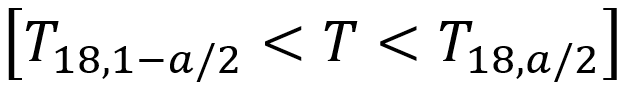

> При пороговом уровне статистической значимости \begin{equation*}a=0.05\end{equation*}
\begin{equation*}64<139<102\end{equation*}

> Равенство не верно,значит, гипотеза должна быть отвергнута с уровнем значимости 5%

<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Выводы</center></h2></div>
    <a id="cell4"></a>



> Проведя тест, мы получили два разных ответа при рассмотрении разных промежутков времени:
-	при периоде 1990–2020  мы видим, что в данных хаос, кол-во смертей-независимые случайные величины
-	при периоде 2003–2020  мы видим, что тенденция о хаосе отвергается, то есть скорее всего данные взаимосвязаны



> Говоря о Коронавирусе, можно сказать: если рассматривать ситуацию в рамках длинного промежутка времени, то 2020-ый год не стал для России критическим. А кол-во смертей в стране-случайная величина, которая изменяется из года в год по-разному.

<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; 
            background-color:DeepSkyBlue;"><h2><center>Анализ количества зараженных в России. Наличие второй волны.</center></h2></div><a id="cell5"></a>

<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Анализ данных</center></h2></div> </h2></div><a id="cell6"></a>

## Подготовка данных

In [17]:
# население городов
fname = r'regions-info.csv'
data = pd.read_csv(fname)
data_region=data[['Region','Population']]
data_region.head()

,Region,Population
0,Россия,146745098
1,Москва,12692466
2,Московская область,7687647
3,Краснодарский край,5677786
4,Санкт-Петербург,5392992


In [18]:
# количество зараженных с марта 2020-январь 2021
fname = r'Таблица_2021-03-30_07-31.csv'
data_rf = pd.read_csv(fname,delimiter = ";")
data_rf.head()

,Дата,Регион,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
0,12.03.2020,Саха (Якутия),0,0,0,0,0,0
1,12.03.2020,Кабардино-Балкария,0,0,0,0,0,0
2,12.03.2020,Тверская обл.,0,0,0,0,0,0
3,12.03.2020,ХМАО – Югра,0,0,0,0,0,0
4,12.03.2020,Еврейская АО,0,0,0,0,0,0


In [19]:
# Города с населением >1.000.000 чел. 
mill_city=data_region.loc[(data_region['Region'] !="Россия") & (data_region['Population'] >= 1000000)]
mill_city.head()
region=mill_city['Region']
region=region.to_numpy()
region=['Москва', 'Московская обл.', 'Краснодарский край',
       'Санкт-Петербург', 'Свердловская обл.', 'Ростовская обл.',
       'Башкортостан', 'Татарстан',
       'Челябинская обл.', 'Нижегородская обл.',
       'Самарская обл.', 'Дагестан', 'Красноярский край',
       'Ставропольский край', 'Новосибирская обл.',
       'Кемеровская обл.', 'Пермский край', 'Волгоградская обл.',
       'Саратовская обл.', 'Иркутская обл.', 'Воронежская обл.',
       'Алтайский край', 'Оренбургская обл.', 'Омская обл.',
       'Крым', 'Приморский край', 'Ленинградская обл.',
       'ХМАО – Югра', 'Белгородская обл.', 'Тюменская обл.',
       'Удмуртская', 'Чечня',
       'Тульская обл.', 'Владимирская обл.', 'Хабаровский край',
       'Пензенская обл.', 'Кировская обл.', 'Тверская обл.',
       'Ярославская обл.', 'Ульяновская обл.','Чувашия',
       'Брянская обл.', 'Вологодская обл.', 'Липецкая обл.',
       'Рязанская обл.', 'Курская обл.', 'Архангельская обл.',
       'Томская обл.', 'Забайкальский край', 'Калининградская обл.',
       'Тамбовская обл.', 'Астраханская обл.', 'Калужская обл.']
stat_mill_city=data_rf.loc[(data_rf['Регион'].isin(region))]
stat_mill_city.head()

,Дата,Регион,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
2,12.03.2020,Тверская обл.,0,0,0,0,0,0
3,12.03.2020,ХМАО – Югра,0,0,0,0,0,0
5,12.03.2020,Санкт-Петербург,1,0,0,0,1,0
9,12.03.2020,Чувашия,0,0,0,0,0,0
12,12.03.2020,Ульяновская обл.,0,0,0,0,0,0


In [20]:
from datetime import datetime
stat_mill_city_gr=stat_mill_city
stat_mill_city_gr = stat_mill_city_gr.groupby('Дата').sum().reset_index()
stat_mill_city_gr=stat_mill_city_gr.sort_values('Дата', kind='mergesort')

stat_mill_city_gr['dd']=stat_mill_city_gr['Дата'].apply(lambda s:s.split('.')[0])
stat_mill_city_gr['mm']=stat_mill_city_gr['Дата'].apply(lambda s:s.split('.')[1])
stat_mill_city_gr['yy']=stat_mill_city_gr['Дата'].apply(lambda s:s.split('.')[2])

stat_mill_city_gr.sort_values(['yy','mm', 'dd'], ascending=[True, True,True], inplace=True)
stat_mill_city_gr.head()

,Дата,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день,dd,mm,yy
99,12.03.2020,34,0,0,0,34,0,12,03,2020
109,13.03.2020,45,0,0,0,11,0,13,03,2020
119,14.03.2020,59,0,0,0,14,0,14,03,2020
129,15.03.2020,63,3,0,0,4,3,15,03,2020
139,16.03.2020,90,5,0,0,27,2,16,03,2020


### Весна

In [21]:
months_v=['.03.','.04.','.05.']
months_stat_v=stat_mill_city['Дата']
months_stat_v=months_stat_v.to_numpy()
months_stat_true_v=[]
for i in months_v:
    for j in months_stat_v:
        if i in j:

            months_stat_true_v.append(j)
vesna_data=stat_mill_city.loc[(stat_mill_city['Дата'].isin(months_stat_true_v))]
vesna_data.tail()
vesna_data_new = vesna_data.groupby('Дата').sum().reset_index()
vesna_data_new=vesna_data_new.sort_values('Дата', kind='mergesort')

vesna_data_new.head()
vesna_data_new['dd']=vesna_data_new['Дата'].apply(lambda s:s.split('.')[0])
vesna_data_new['mm']=vesna_data_new['Дата'].apply(lambda s:s.split('.')[1])
vesna_data_new['yy']=vesna_data_new['Дата'].apply(lambda s:s.split('.')[2])
vesna_data_new.describe()

,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,105469.222222,25876.419753,1046.135802,53.246914,4517.037037,1887.679012
std,120738.677787,41380.798195,1272.635423,52.168365,3765.269959,2733.709923
min,34.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,2600.000000,184.000000,22.000000,2.000000,485.000000,40.000000
50%,48453.000000,3543.000000,411.000000,43.000000,4706.000000,397.000000
75%,201677.000000,35132.000000,1836.000000,91.000000,7884.000000,3356.000000
max,365880.000000,152902.000000,4313.000000,208.000000,10637.000000,11599.000000


In [22]:
vesna_data_new.sort_values(['mm', 'dd'], ascending=[True, True], inplace=True)
vesna_data_new=vesna_data_new.reset_index(drop=True)
vesna_data_new.head()

,Дата,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день,dd,mm,yy
0,12.03.2020,34,0,0,0,34,0,12,03,2020
1,13.03.2020,45,0,0,0,11,0,13,03,2020
2,14.03.2020,59,0,0,0,14,0,14,03,2020
3,15.03.2020,63,3,0,0,4,3,15,03,2020
4,16.03.2020,90,5,0,0,27,2,16,03,2020


### Лето

In [23]:
months_l=['.06.','.07.','.08.']
months_stat_l=stat_mill_city['Дата']
months_stat_l=months_stat_l.to_numpy()
months_stat_true_l=[]
for i in months_l:
    for j in months_stat_l:
        if i in j:
            months_stat_true_l.append(j)
leto_data=stat_mill_city.loc[(stat_mill_city['Дата'].isin(months_stat_true_l))]
leto_data.tail()
leto_data_new = leto_data.groupby('Дата').sum().reset_index()
leto_data_new=leto_data_new.sort_values('Дата', kind='mergesort')
leto_data_new.head()
leto_data_new['dd']=leto_data_new['Дата'].apply(lambda s:s.split('.')[0])
leto_data_new['mm']=leto_data_new['Дата'].apply(lambda s:s.split('.')[1])
leto_data_new['yy']=leto_data_new['Дата'].apply(lambda s:s.split('.')[2])
leto_data_new.describe()


,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
count,92.000000,92.000000,92.00000,92.00000,92.000000,92.000000
mean,635232.945652,448080.717391,10546.50000,120.98913,5170.554348,5745.543478
std,134293.115522,154995.548525,3251.90385,35.67358,1156.597248,2162.312074
min,373708.000000,156584.000000,4463.00000,49.00000,3760.000000,2048.000000
25%,529600.500000,323045.000000,7810.00000,97.75000,4237.250000,4473.000000
50%,647730.000000,464123.500000,10962.50000,117.00000,4989.500000,5586.000000
75%,750899.750000,585279.250000,13404.75000,149.00000,5740.750000,7248.750000
max,841571.000000,681492.000000,15444.00000,206.00000,7828.000000,10724.000000


In [24]:
leto_data_new.sort_values(['mm', 'dd'], ascending=[True, True], inplace=True)
leto_data_new= leto_data_new.reset_index(drop=True)
leto_data_new.head()

,Дата,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день,dd,mm,yy
0,01.06.2020,373708,156584,4463,150,7828,3682,01,06,2020
1,02.06.2020,381426,166400,4632,169,7718,9816,02,06,2020
2,03.06.2020,388728,174068,4793,161,7302,7668,03,06,2020
3,04.06.2020,396135,181302,4951,158,7407,7234,04,06,2020
4,05.06.2020,403419,188377,5080,129,7284,7075,05,06,2020


### Осень и декабрь

In [25]:
months_o=['.09.','.10.','.11.','.12.']
months_stat_o=stat_mill_city['Дата']
months_stat_o=months_stat_o.to_numpy()
months_stat_true_o=[]
for i in months_o:
    for j in months_stat_o:
        if i in j:

            months_stat_true_o.append(j)
osen_data=stat_mill_city.loc[(stat_mill_city['Дата'].isin(months_stat_true_o))]
osen_data.head()
osen_data_new = osen_data.groupby('Дата').sum().reset_index()
osen_data_new=osen_data_new.sort_values('Дата', kind='mergesort')
osen_data_new.head()
osen_data_new['dd']=osen_data_new['Дата'].apply(lambda s:s.split('.')[0])
osen_data_new['mm']=osen_data_new['Дата'].apply(lambda s:s.split('.')[1])
osen_data_new['yy']=osen_data_new['Дата'].apply(lambda s:s.split('.')[2])
osen_data_new.describe()


,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
count,1.220000e+02,1.220000e+02,122.000000,122.000000,122.000000,122.000000
mean,1.490871e+06,1.169629e+06,27746.409836,283.770492,14601.221311,11657.163934
std,5.422445e+05,4.235072e+05,10272.348541,153.395227,7209.905916,7063.763953
min,8.454230e+05,6.868250e+05,15545.000000,47.000000,3852.000000,2113.000000
25%,9.946955e+05,8.121582e+05,18762.500000,141.250000,7332.750000,4889.250000
50%,1.354008e+06,1.020362e+06,24921.000000,264.000000,14780.500000,10268.500000
75%,1.919223e+06,1.492104e+06,35391.750000,430.750000,21883.000000,19275.250000
max,2.622920e+06,2.103666e+06,50064.000000,550.000000,25226.000000,23755.000000


In [26]:
osen_data_new.sort_values(['mm', 'dd'], ascending=[True, True], inplace=True)
osen_data_new=osen_data_new.reset_index(drop=True)
osen_data_new.head()

,Дата,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день,dd,mm,yy
0,01.09.2020,845423,686825,15545,101,3852,5333,01,09,2020
1,02.09.2020,849397,691511,15649,104,3974,4686,02,09,2020
2,03.09.2020,853392,696449,15749,100,3995,4938,03,09,2020
3,04.09.2020,857461,701406,15859,110,4069,4957,04,09,2020
4,05.09.2020,861577,706040,15958,99,4116,4634,05,09,2020


### Показатели заражений в день </h2></div><a id="cell7"></a>

##### Весна


<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive">

\begin{equation*}
mean_v=4517
\end{equation*}
    \begin{equation*}
max_v=10637
\end{equation*}
    \begin{equation*}
std_v=3765
\end{equation*}
    
    
</div>

Text(0.5, 1.0, 'Статистика кол-ва зараженных в день весной')

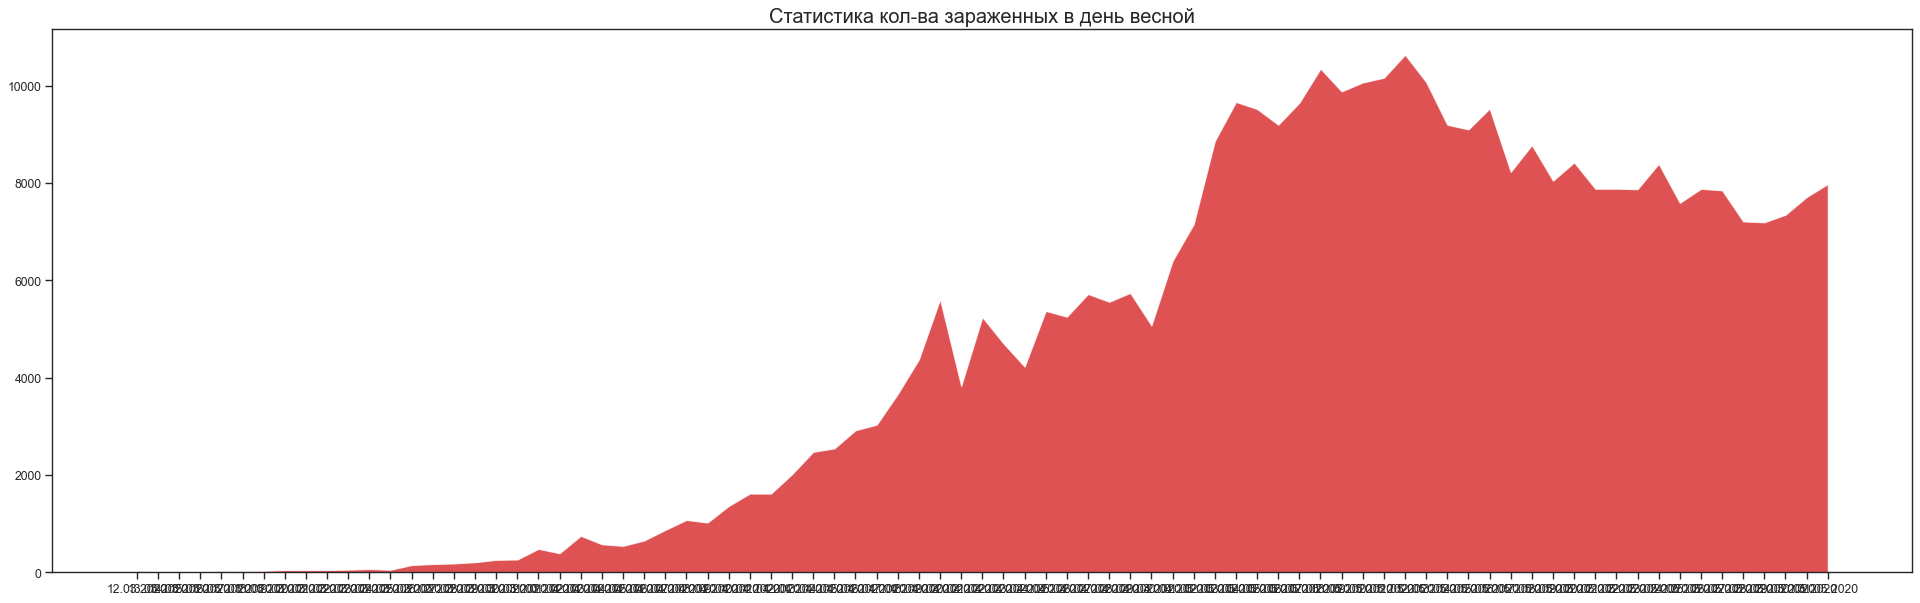

In [27]:
mycolors = ['tab:red']      

fig, ax = plt.subplots(1,1,figsize=(30,9 ), dpi= 80)
columns = vesna_data_new.columns[1:]
labs = columns.values.tolist()

x  = vesna_data_new['Дата'].values.tolist()
y0 = vesna_data_new['Заражений за день'].values.tolist()
y = np.vstack([y0])
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)
ax.set_title('Статистика кол-ва зараженных в день весной', fontsize=18)

##### Лето





<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive">

\begin{equation*}
mean_l=5170
\end{equation*}
    \begin{equation*}
max_l=7828
\end{equation*}
    \begin{equation*}
std_l=1156
\end{equation*}
    
    
</div>

Text(0.5, 1.0, 'Статистика кол-ва зараженных в летом весной')

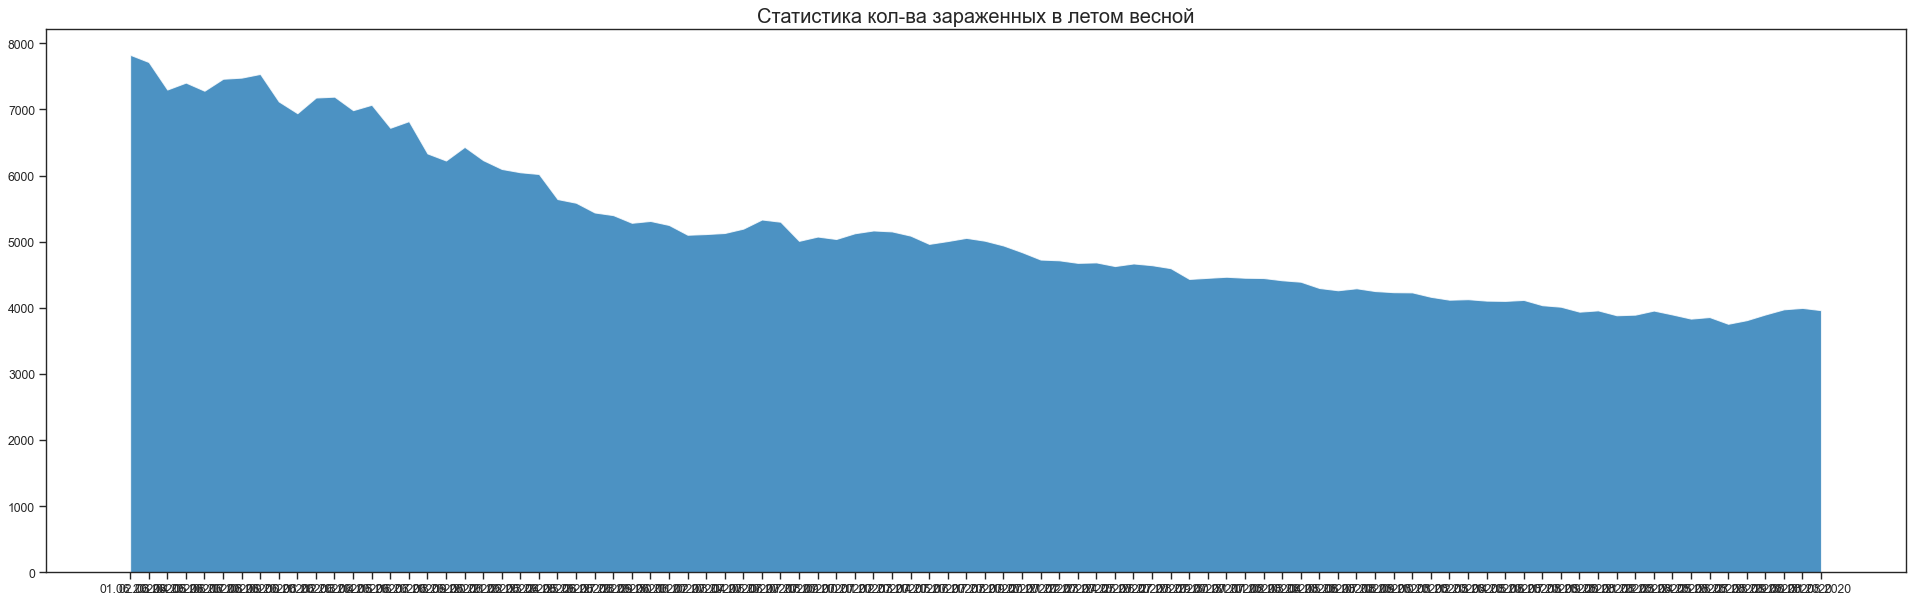

In [28]:
mycolors = ['tab:blue']      

fig, ax = plt.subplots(1,1,figsize=(30,9 ), dpi= 80)
columns = leto_data_new.columns[1:]
labs = columns.values.tolist()

x  = leto_data_new['Дата'].values.tolist()
y0 = leto_data_new['Заражений за день'].values.tolist()
y = np.vstack([y0])
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)
ax.set_title('Статистика кол-ва зараженных в летом весной', fontsize=18)

##### Осень и зима



<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive">

\begin{equation*}
mean_o=14601
\end{equation*}
    \begin{equation*}
max_o=25226
\end{equation*}
    \begin{equation*}
std_o=7209
\end{equation*}
    
    
</div>

Text(0.5, 1.0, 'Статистика кол-ва зараженных в день осенью и зимой')

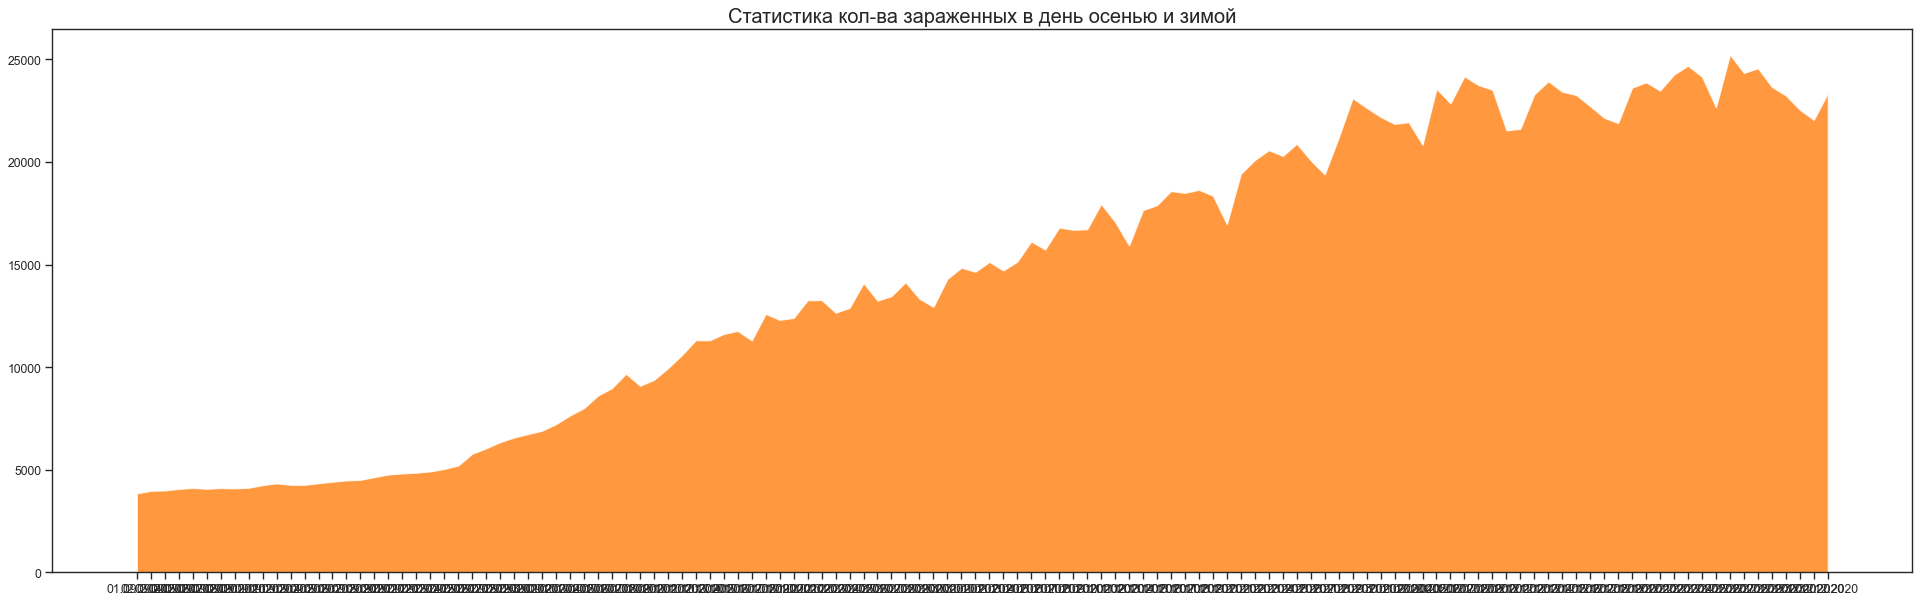

In [29]:
mycolors = ['tab:orange']      

fig, ax = plt.subplots(1,1,figsize=(30,9 ), dpi= 80)
columns = osen_data_new.columns[1:]
labs = columns.values.tolist()

x  = osen_data_new['Дата'].values.tolist()
y0 = osen_data_new['Заражений за день'].values.tolist()
y = np.vstack([y0])
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)
ax.set_title('Статистика кол-ва зараженных в день осенью и зимой', fontsize=18)

##### График распространения болезни за все время

Text(0.5, 1.0, 'График распространения болезни за все время')

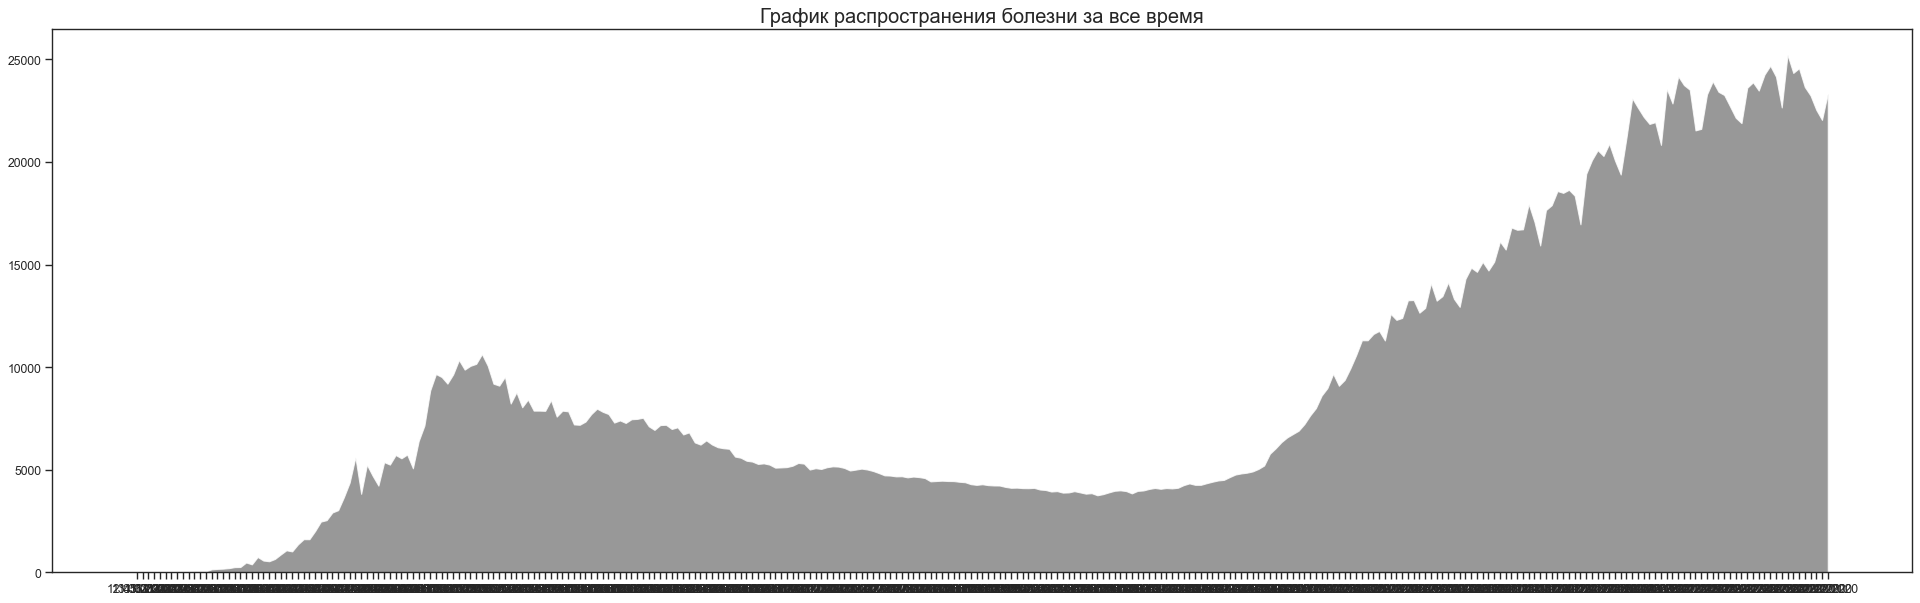

In [30]:
mycolors = ['tab:grey']      

fig, ax = plt.subplots(1,1,figsize=(30,9 ), dpi= 80)
columns = osen_data_new.columns[1:]
labs = columns.values.tolist()

x  = stat_mill_city_gr['Дата'].values.tolist()
y0 = stat_mill_city_gr['Заражений за день'].values.tolist()
y = np.vstack([y0])
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)
ax.set_title('График распространения болезни за все время', fontsize=18)

### *Промежуточный вывод*:

> По графикам видно, что весной и осенью 2020-го года происходили всплески заражения вирусом 

> Данные представляют собой волну с пиками в апреле и начале декабря

<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Тест Вилкоксона</center></h2></div>
    <a id="cell3"></a> </h2></div><a id="cell8"></a>

<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive
              ">
    
***Критерий Уилкоксона (Вилкоксона)*** двухвыборочный — непараметрический статистический критерий, используемый для оценки различий между двумя выборками, взятыми из закона распределения, отличного от нормального, либо измеренными с использованием порядковой шкалы. </div>

<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive
 
            ">
    ***Критерий Уилкоксона (Вилкоксона)*** двухвыборочный — непараметрический статистический критерий, используемый для оценки различий между двумя выборками, взятыми из закона распределения, отличного от нормального, либо измеренными с использованием порядковой шкалы. 
</div>


### *Проверка гипотез*:

> Необходимо проверить наличие, так называемой, второй волны. Для этого нужно сравнить распространение болезни весной и летом, а также летом и осенью

<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive
              ">
    
> Если гипотеза: \begin{equation*}H_0 \end{equation*}
верна, в два периода распространение кол-ва заражений в России значительно отличалось

> Иными словами :если сделать проверку для весны и лета, лета и осени , то можно будет утверждать о наличии второй волны. 

> При отклонении гипотезы: распространение кол-ва заражений в России не отличалось в разные периода, второй волны не было

</div>

### *Алгорит на данных*

<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive
    
> Если гипотеза: \begin{equation*}H_0 \end{equation*}
**верна**, то можно утверждать, что в два разных периода распределение кол-ва случаев заметно отличалось

> Иными словами : если мы проверим эту гипотезу для весны+ лета, лета+осени ,и окажется, что лето отличалось по ситуации от других периодов, то можно будет говорить о второй волне

> При отклонении гипотезы распространение болезни было во всех периоды одинаковое, никкаких волн не было

</div>

In [31]:
# Весна
X_1=vesna_data_new.groupby(['yy','mm','dd']).agg({'Смертей за день':'mean'}).values.tolist()
# Лето
X_2=leto_data_new.groupby(['yy','mm','dd']).agg({'Смертей за день':'mean'}).values.tolist()
X_3=osen_data_new.groupby(['yy','mm','dd']).agg({'Смертей за день':'mean'}).values.tolist()
need_1=[]
need_2=[]
need_3=[]
for i in range (len(X_1)):
    need_1.append(X_1[i][0])
for i in range (len(X_2[:81])):
    need_2.append(X_2[i][0])
for i in range (len(X_3[41:])):
    need_3.append(X_3[i][0])

In [34]:
wilcoxon(need_1,need_2,zero_method="wilcox")

WilcoxonResult(statistic=349.5, pvalue=6.707098323203084e-10)

In [35]:
wilcoxon(need_2,need_3,zero_method="wilcox")


WilcoxonResult(statistic=747.5, pvalue=2.8534586700917976e-05)

> В обоих случаях  при \begin{equation*}a=0.05\end{equation*}
\begin{equation*}p-value < a\end{equation*}

<div style="outline: 2px solid #000; 
    border: 3px solid #fff; 
    border-radius: 10px; "><h2><center>Выводы</center></h2></div>
    <a id="cell9"></a>

<div style=" 
    box-shadow: 
                3px 3px red, -1em 0 0.4em olive
              ">
    
> При сравнении весны и лета, лета и осени мы выявили, что ***p-value*** меньше заданного пороговом уровня статистической значимости. Значит, в России в эти периоды распределение кол-ва кейсов заражения значительно отличалось, что дает нам полагать о наличии второй волны 

</div>